In [18]:
import mlflow
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:

mlflow.set_tracking_uri(rf"file:///C:\Users\jc.ruedah\Desktop\VRI_carpeta\VRI_PROYECTO\mlruns") 


In [20]:
# Cargar el experimento por nombre o ID
experiment = mlflow.get_experiment_by_name("AE_only_gpt_exp1")
print("ID del experimento:", experiment.experiment_id)

ID del experimento: 715053864426699666


In [21]:
runs_df = mlflow.search_runs(experiment_ids=[experiment.experiment_id])

In [22]:
runs_df = runs_df[runs_df['status'] == 'FINISHED']

In [23]:
df_selected = runs_df[['params.column', 'params.reducer', 'params.model','params.n_dim' ,'metrics.f1_score', 'metrics.accuracy']]
df_selected

,params.column,params.reducer,params.model,params.n_dim,metrics.f1_score,metrics.accuracy
0,Embedding_Concat2,ae,xgb,768,1.000000,1.0000
1,Embedding_Concat1,ae,xgb,768,1.000000,1.0000
2,Embedding_Respuesta,ae,xgb,768,1.000000,1.0000
3,Embedding_Concat2,ae,xgb,512,1.000000,1.0000
4,Embedding_Concat1,ae,xgb,512,1.000000,1.0000
...,...,...,...,...,...,...
595,Embedding_Concat1,ae,mlp,4,0.250975,0.4225
596,Embedding_Respuesta,ae,mlp,4,0.250975,0.4225
597,Embedding_Concat2,ae,mlp,2,0.250975,0.4225
598,Embedding_Concat1,ae,mlp,2,0.250975,0.4225


In [25]:
df_selected['params.n_dim'] = df_selected['params.n_dim'].astype(int)

C:\Users\jc.ruedah\AppData\Local\Temp\ipykernel_49860\3336963693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['params.n_dim'] = df_selected['params.n_dim'].astype(int)


In [29]:
sns.set_style('whitegrid')

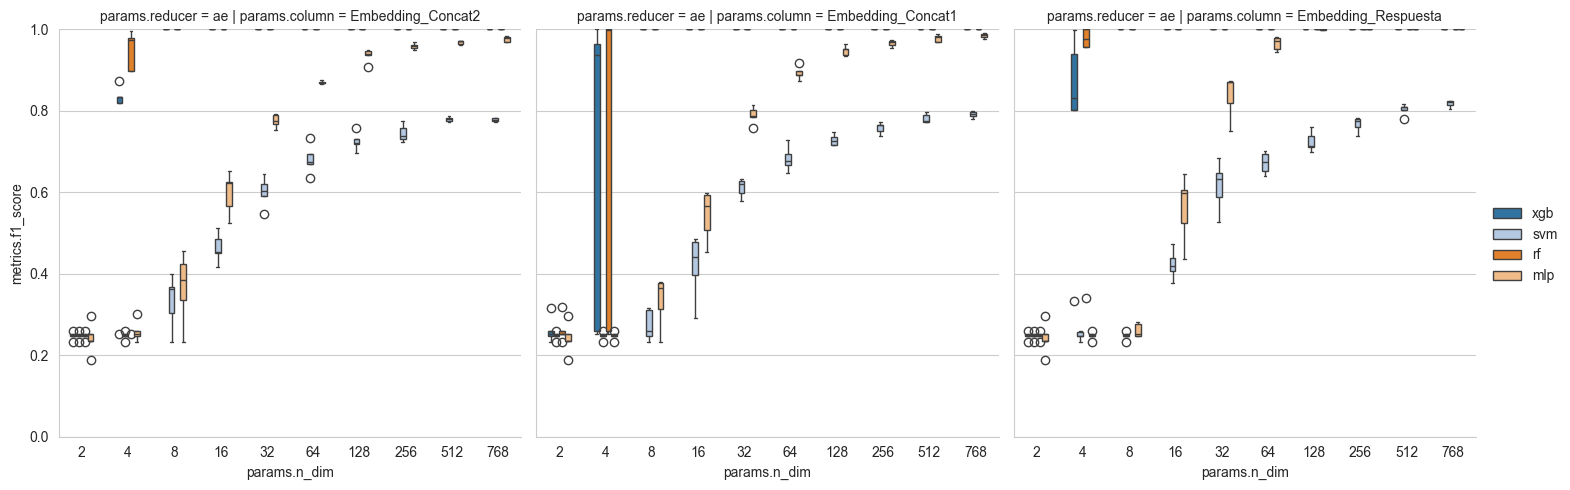

In [31]:
g = sns.FacetGrid(df_selected,
                   col='params.column', 
                   row='params.reducer', 
                   palette = 'tab20',
                   height=5, 
                   sharex=False)
g.map_dataframe(sns.boxplot, 
      x = 'params.n_dim', 
      y = 'metrics.f1_score',
      hue='params.model',
      width=0.5,
      palette = 'tab20'
      )
g.set(ylim=(0,1))
g.add_legend() 
plt.show()